# Importing required libraries

In [29]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
from warnings import filterwarnings
filterwarnings('ignore')
from scipy.stats import zscore
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# read the data

In [15]:
df=pd.read_csv('C:\\Users\\Srihari\\Desktop\\sparks foundation\\Iris.csv')
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


# Checking for null values

In [17]:
#checking for null values in the data
df.isnull().sum()
#there are no null values in the dataset

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

# Bivariate analysis


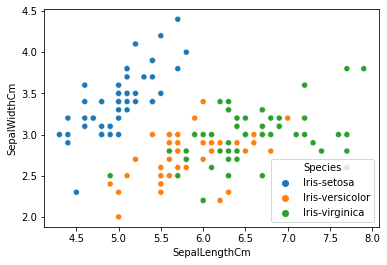

In [18]:
sns.scatterplot(df['SepalLengthCm'],df['SepalWidthCm'],hue=df['Species'])
plt.show()

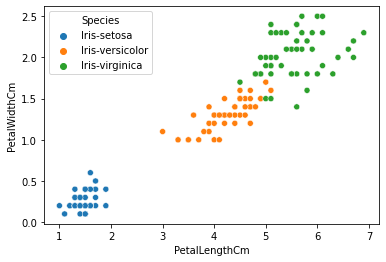

In [19]:
sns.scatterplot(df['PetalLengthCm'],df['PetalWidthCm'],hue=df['Species'])
plt.show()

In [20]:
df['Species'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

# Encoding categorical variables

In [21]:
df['Species']=df['Species'].map({'Iris-setosa':1,'Iris-versicolor':2,'Iris-virginica':3})

In [22]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,1
1,2,4.9,3.0,1.4,0.2,1
2,3,4.7,3.2,1.3,0.2,1
3,4,4.6,3.1,1.5,0.2,1
4,5,5.0,3.6,1.4,0.2,1


# Feature Scaling

In [23]:
from sklearn.preprocessing import StandardScaler
df1=StandardScaler().fit_transform(df.drop('Species',axis=1))
df2=pd.DataFrame(df1,columns=df.drop('Species',axis=1).columns)
df2.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,-1.720542,-0.900681,1.032057,-1.341272,-1.312977
1,-1.697448,-1.143017,-0.124958,-1.341272,-1.312977
2,-1.674353,-1.385353,0.337848,-1.398138,-1.312977
3,-1.651258,-1.506521,0.106445,-1.284407,-1.312977
4,-1.628164,-1.021849,1.263460,-1.341272,-1.312977


In [24]:
df3=df2.drop('Id',axis=1)
#id is having unique values in the dataset.

# Train and test split

In [25]:
X=df3
y=df['Species']
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=10,test_size=0.2)

# Model building

In [26]:
#Decision Tree

In [27]:
dtf=DecisionTreeClassifier()
dtf.fit(X_train,y_train)
y_pred=dtf.predict(X_test)
accuracy_score(y_pred,y_test)

0.9666666666666667

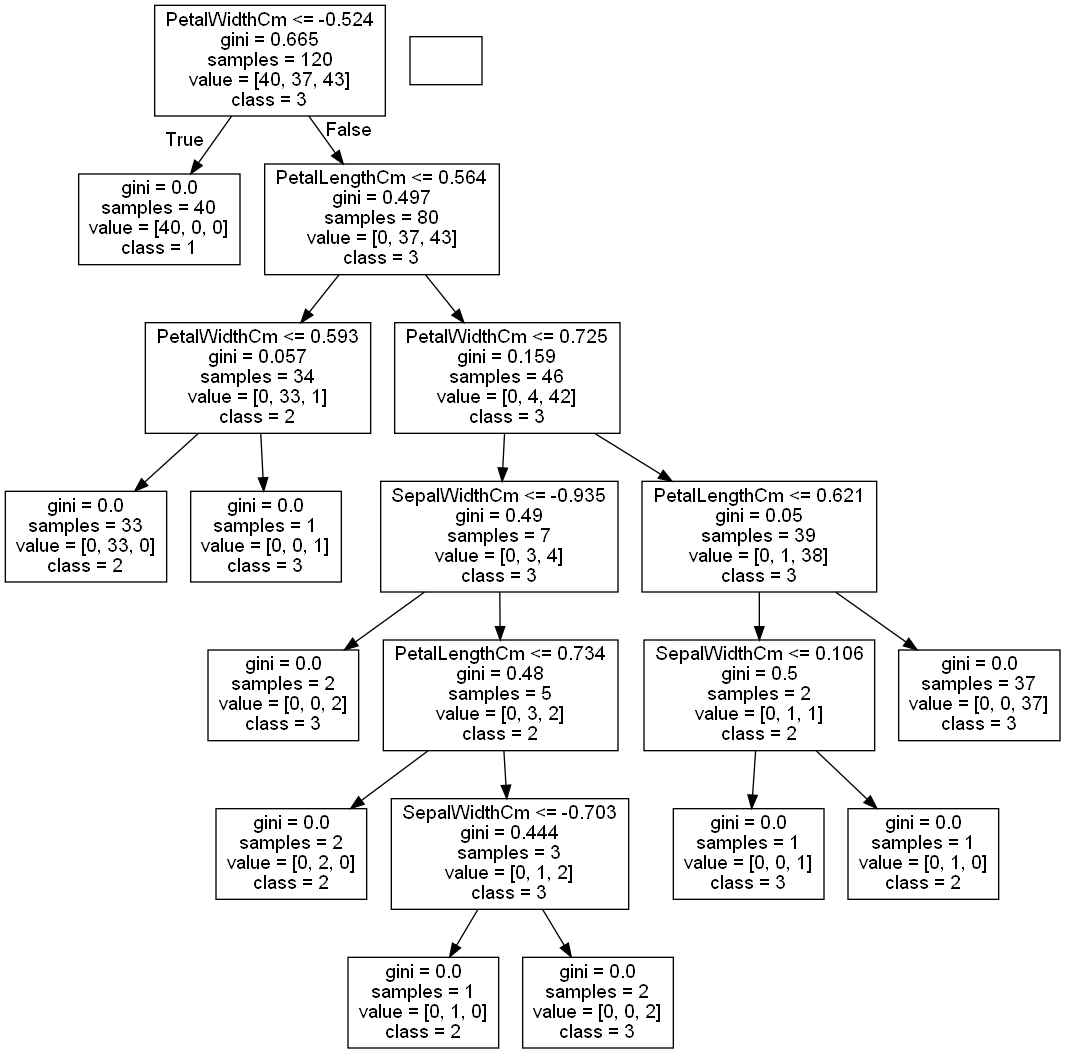

In [28]:
from sklearn import tree
dot_data = tree.export_graphviz(dtf, feature_names = X.columns, class_names = ['1', '2','3'])
dot_data

import pydotplus
from IPython.display import Image

graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())